Projet de sciences de données

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

Scikit-learn est une des librairies utiliser en python pour faire  des prédictions grace au machine learning 
Source: https://www.youtube.com/watch?v=oLlN5SYZr5g, https://www.youtube.com/watch?v=Eqv98w1ukZk

Calendar est une librairie de fonctions utiles à l'extraction du mois de la colonne 'Date' en colonne 'Mois'. Cette dernière a aidé dans la prédiction de la consommation.

In [2]:
#Importer le jeu de données

In [158]:
data_load = pd.read_csv("eco2mix-regional-tr.csv", sep=";")
columns_to_delete =["Déstockage batterie","Stockage batterie",'Column 68','Nature']
data= data_load.drop(columns_to_delete, axis = 1)

In [159]:
data['Mois'] = pd.to_datetime(data['Date']).dt.month
moyenne_tch_par_mois = data.groupby('Mois')['TCH Bioénergies (%)'].mean()
variance_tch_par_mois = data.groupby('Mois')['TCH Bioénergies (%)'].var()

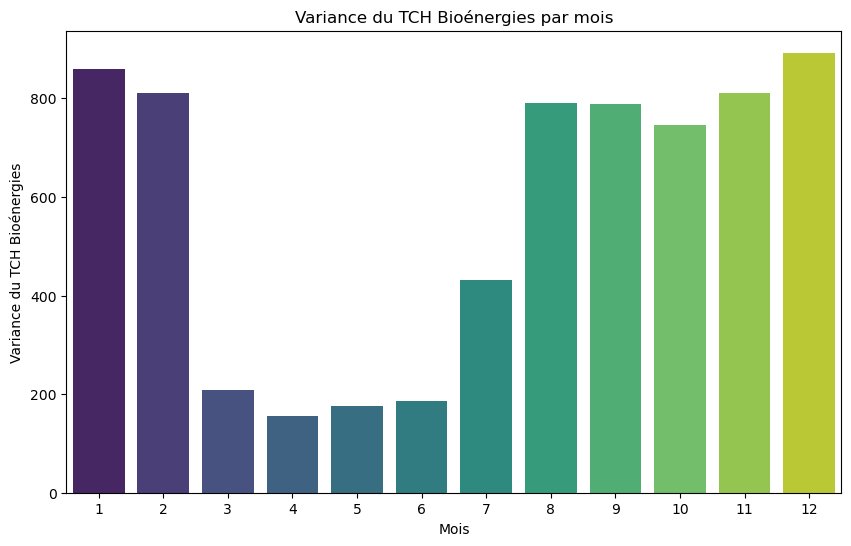

In [160]:
variance_df = variance_tch_par_mois.reset_index(name='Variance TCH Bioénergies')

# Tracer le graphique à barres avec seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Mois', y='Variance TCH Bioénergies', data=variance_df, palette='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel('Mois')
plt.ylabel('Variance du TCH Bioénergies')
plt.title('Variance du TCH Bioénergies par mois')

# Afficher le graphique
plt.show()

Prédictions

In [161]:
columns= ['Thermique (MW)']
data_training = data[columns]
variable_to_predict = data["Consommation (MW)"]

X =data_training
y=variable_to_predict

missing_values_X = X.isnull().sum()
print("Missing values of X: ", missing_values_X)
missing_values_y = y.isnull().sum()
print("Missing values y: ", missing_values_y)

if missing_values_X.any() or missing_values_y:
    X=X.fillna(X.mean())
    y=y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
error_metric = mean_squared_error(y_pred = y_pred_test, y_true = y_test)
print(error_metric)



Missing values of X:  Thermique (MW)    1176
dtype: int64
Missing values y:  2527
3572088.2194319596


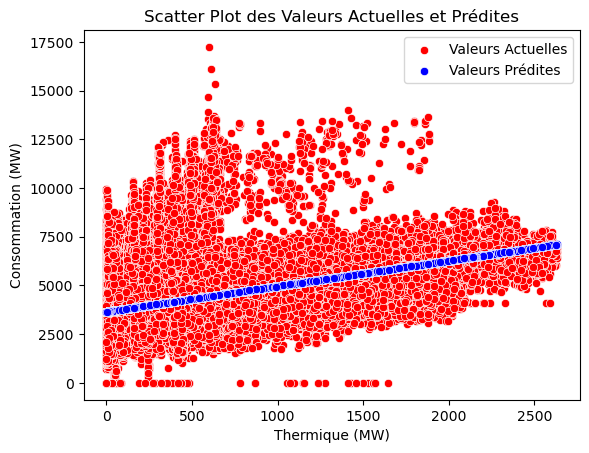

In [163]:
data = X_test.copy()
data['Consommation (MW)'] = y_test

# Tracer le nuage de points avec Seaborn
sns.scatterplot(data=data, x='Thermique (MW)', y='Consommation (MW)', color='red', label='Valeurs Actuelles')

# Tracer le nuage de points des valeurs prédites
sns.scatterplot(data=data, x='Thermique (MW)', y=y_pred_test, color='blue', label='Valeurs Prédites')

# Ajouter des labels et une légende
plt.xlabel('Thermique (MW)')
plt.ylabel('Consommation (MW)')
plt.title('Scatter Plot des Valeurs Actuelles et Prédites')
plt.legend()

# Afficher le plot
plt.show()